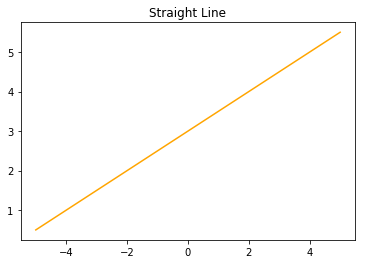

In [50]:
'''
直线方程的图像
'''

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)

y = 0.5 * x + 3
plt.plot(x,y,c='orange')

plt.title('Straight Line')
plt.show()

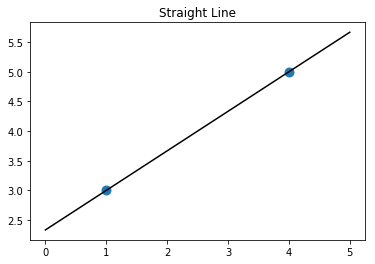

y = 0.667 x + 2.333


In [51]:
'''
通过2点画出直线 并推出对应方程
'''

from sklearn.linear_model import LinearRegression
X = [[1],[4]]
y = [3,5]
lr = LinearRegression().fit(X, y)

z = np.linspace(0,5, 20)
plt.scatter(X,y,s=80)
plt.plot(z, lr.predict(z.reshape(-1,1)), c='k')
plt.title('Straight Line')
plt.show()

print('y = {:.3f}'.format(lr.coef_[0]), 'x', '+ {:.3f}'.format(lr.intercept_))

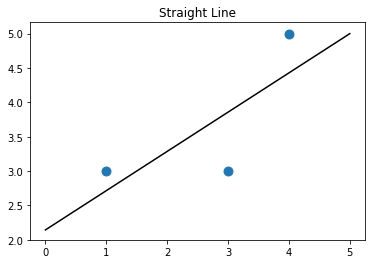

y = 0.571 x + 2.143


In [52]:
'''
3个点会怎样呢
'''

from sklearn.linear_model import LinearRegression
X = [[1],[4],[3]]
y = [3,5,3]
lr = LinearRegression().fit(X, y)

z = np.linspace(0,5, 20)
plt.scatter(X,y,s=80)
plt.plot(z, lr.predict(z.reshape(-1,1)), c='k')
plt.title('Straight Line')
plt.show()

print('y = {:.3f}'.format(lr.coef_[0]), 'x', '+ {:.3f}'.format(lr.intercept_))

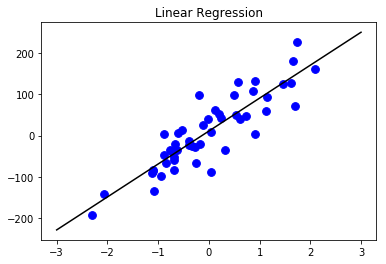

y = 79.525 x + 10.922


In [53]:
'''
3个点会怎样呢
'''

from sklearn.datasets import make_regression
X, y = make_regression(n_samples=50, n_features=1, n_informative=1, noise=50, random_state=1)

reg = LinearRegression()
reg.fit(X, y)

# X[0][0] = -2
# y[0] = 250

z = np.linspace(-3,3,200).reshape(-1,1)
plt.scatter(X,y,c='b',s=60)
plt.plot(z, reg.predict(z), c='k')
plt.title('Linear Regression')
plt.show()

print('y = {:.3f}'.format(reg.coef_[0]), 'x', '+ {:.3f}'.format(reg.intercept_))

In [54]:
'''
线性回归  无噪音数据
'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=100, n_features=2, n_informative=2, random_state=38)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef: {}".format(lr.coef_[:]))
print("lr.intercept: {}".format(lr.intercept_))

print("训练数据集得分: {:.2f}".format(lr.score(X_train, y_train)))
print("测试数据集得分: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef: [70.38592453  7.43213621]
lr.intercept: -1.4210854715202004e-14
训练数据集得分: 1.00
测试数据集得分: 1.00


In [55]:
'''
糖尿病情
'''

from sklearn.datasets import load_diabetes
X, y = load_diabetes().data, load_diabetes().target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
lr = LinearRegression().fit(X_train, y_train)

print("训练数据集得分: {:.2f}".format(lr.score(X_train, y_train)))
print("测试数据集得分: {:.2f}".format(lr.score(X_test, y_test)))

训练数据集得分: 0.53
测试数据集得分: 0.46


In [56]:
'''
岭回归
'''
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("训练数据集得分: {:.2f}".format(ridge.score(X_train, y_train)))
print("测试数据集得分: {:.2f}".format(ridge.score(X_test, y_test)))

训练数据集得分: 0.43
测试数据集得分: 0.43


In [57]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("训练数据集得分: {:.2f}".format(ridge10.score(X_train, y_train)))
print("测试数据集得分: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("训练数据集得分: {:.2f}".format(ridge01.score(X_train, y_train)))
print("测试数据集得分: {:.2f}".format(ridge01.score(X_test, y_test)))

训练数据集得分: 0.15
测试数据集得分: 0.16
训练数据集得分: 0.52
测试数据集得分: 0.47


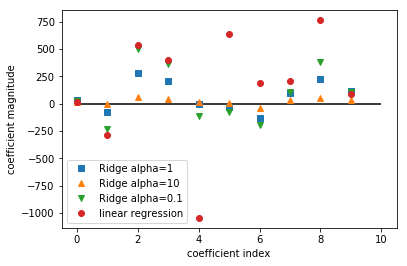

In [63]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label='linear regression')
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
plt.hlines(0,0, len(lr.coef_))
plt.legend()

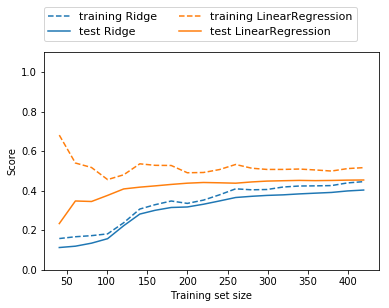

In [68]:
'''
糖尿病数据集中岭回归与线性回归的学习曲线
'''

from sklearn.model_selection import learning_curve, KFold
def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(
        est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label='training ' + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label='test ' + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)

plot_learning_curve(Ridge(alpha=1), X, y)
plot_learning_curve(LinearRegression(), X, y)
plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)

In [72]:
'''
套索回归
'''

from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("套索回归 训练数据集得分: {:.2f}".format(lasso.score(X_train, y_train)))
print("套索回归 测试数据集得分: {:.2f}".format(lasso.score(X_test, y_test)))
print("套索回归使用的特征数: {}".format(np.sum(lasso.coef_ != 0)))
print("\n")


lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("套索回归 训练数据集得分: {:.2f}".format(lasso01.score(X_train, y_train)))
print("套索回归 测试数据集得分: {:.2f}".format(lasso01.score(X_test, y_test)))
print("套索回归使用的特征数: {}".format(np.sum(lasso01.coef_ != 0)))
print("\n")

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("套索回归 训练数据集得分: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("套索回归 测试数据集得分: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("套索回归使用的特征数: {}".format(np.sum(lasso00001.coef_ != 0)))
print("\n")

套索回归 训练数据集得分: 0.36
套索回归 测试数据集得分: 0.37
套索回归使用的特征数: 3


套索回归 训练数据集得分: 0.52
套索回归 测试数据集得分: 0.48
套索回归使用的特征数: 7


套索回归 训练数据集得分: 0.53
套索回归 测试数据集得分: 0.46
套索回归使用的特征数: 10


